In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

In [143]:
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11


In [144]:
print(df.describe())
print(df.info())

         Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price      CPI  \
count 6,435.00      6,435.00      6,435.00     6,435.00    6,435.00 6,435.00   
mean     23.00  1,046,964.88          0.07        60.66        3.36   171.58   
std      12.99    564,366.62          0.26        18.44        0.46    39.36   
min       1.00    209,986.25          0.00        -2.06        2.47   126.06   
25%      12.00    553,350.10          0.00        47.46        2.93   131.74   
50%      23.00    960,746.04          0.00        62.67        3.44   182.62   
75%      34.00  1,420,158.66          0.00        74.94        3.73   212.74   
max      45.00  3,818,686.45          1.00       100.14        4.47   227.23   

       Unemployment  
count      6,435.00  
mean           8.00  
std            1.88  
min            3.88  
25%            6.89  
50%            7.87  
75%            8.62  
max           14.31  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data co

In [145]:
SalesGroupDataByStore = df.groupby("Store",as_index=False).sum()
SalesGroupDataByStore.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,"222,402,808.85",10,"9,767.87",460.42,"30,887.56","1,088.29"
1,2,"275,382,440.98",10,"9,754.94",460.42,"30,837.42","1,090.21"
2,3,"57,586,735.07",10,"10,215.09",460.42,"31,372.99","1,026.31"
3,4,"299,543,953.38",10,"8,902.23",460.03,"18,401.19",852.95
4,5,"45,475,688.90",10,"9,925.65",460.42,"30,968.88",900.24


In [146]:
min_store = SalesGroupDataByStore["Weekly_Sales"].idxmin()
min_store_data = SalesGroupDataByStore.loc[min_store]
print(min_store_data)

Store                  33.00
Weekly_Sales   37,160,221.96
Holiday_Flag           10.00
Temperature        10,972.13
Fuel_Price            511.36
CPI                18,401.19
Unemployment        1,220.24
Name: 32, dtype: float64


In [147]:
max_store = SalesGroupDataByStore["Weekly_Sales"].idxmax()
max_store_data = SalesGroupDataByStore.loc[max_store]
print(max_store_data)


Store                   20.00
Weekly_Sales   301,397,792.46
Holiday_Flag            10.00
Temperature          7,929.55
Fuel_Price             488.72
CPI                 29,892.45
Unemployment         1,054.11
Name: 19, dtype: float64


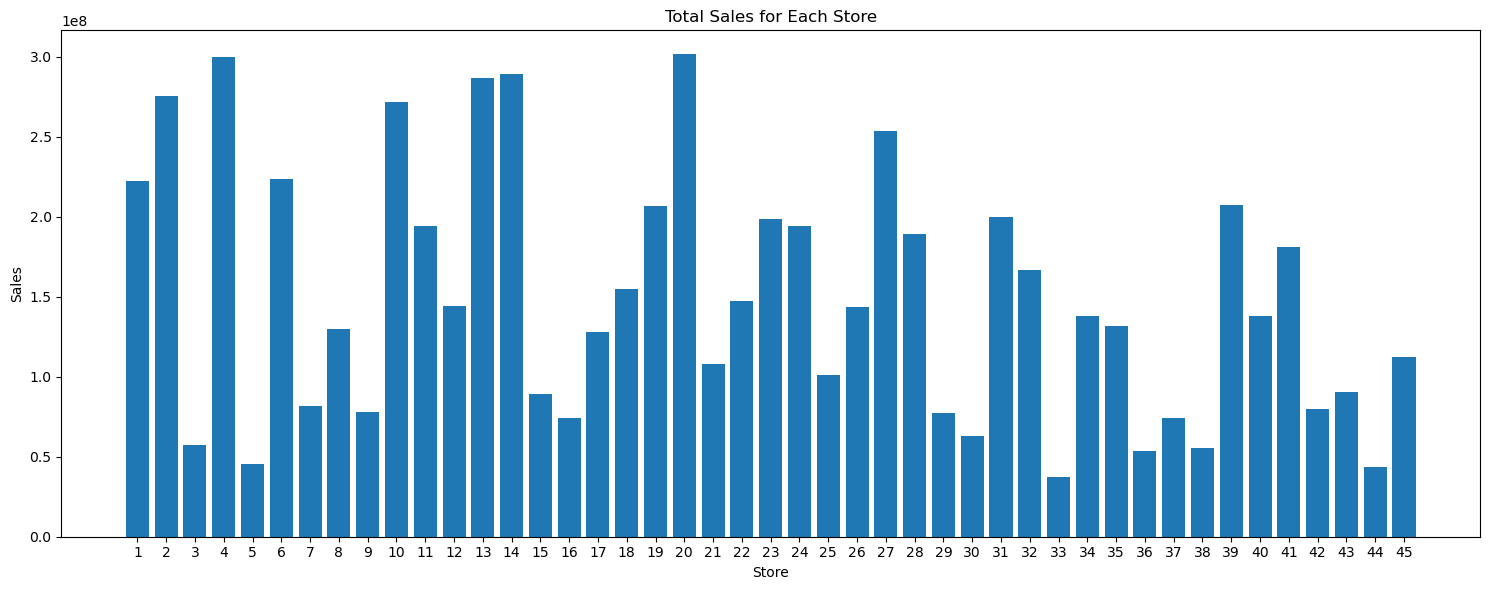

In [177]:
plt.figure(figsize=(15, 6))
plt.bar(SalesGroupDataByStore["Store"], SalesGroupDataByStore["Weekly_Sales"])
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Sales for Each Store')
plt.xticks(range(1, 46))  
plt.tight_layout()  
plt.show()


<BarContainer object of 45 artists>

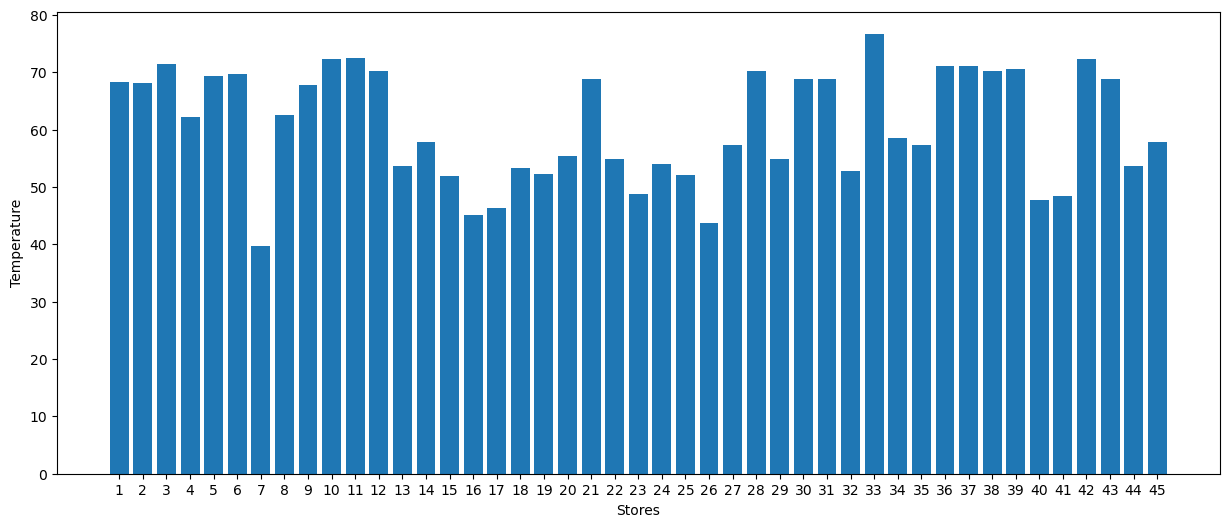

In [209]:
plt.figure(figsize=(15, 6))
avgTemp = SalesGroupDataByStore['Temperature']/ df.groupby("Store" , as_index=False).count()['Temperature']
plt.xticks(range(1,SalesGroupDataByStore['Temperature'].count()+1))
plt.xlabel('Stores')
plt.ylabel('Average Temperature')
plt.bar(SalesGroupDataByStore['Store'], avgTemp)

<BarContainer object of 45 artists>

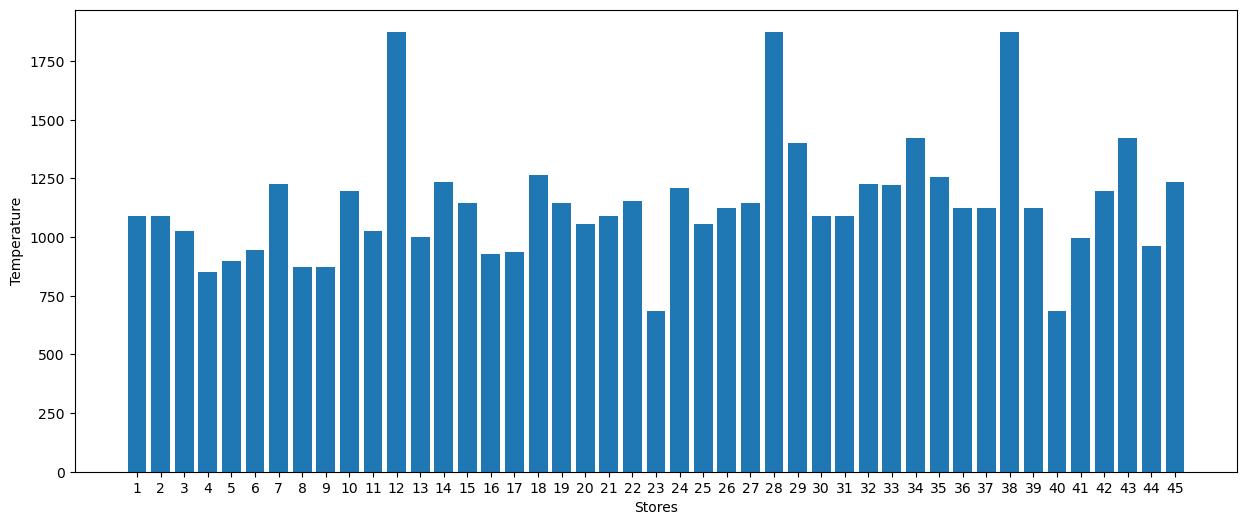

In [210]:
plt.figure(figsize=(15, 6))
plt.xticks(range(1,SalesGroupDataByStore['Temperature'].count()+1))
plt.xlabel('Stores')
plt.ylabel('Umemployment')
plt.bar(SalesGroupDataByStore['Store'], SalesGroupDataByStore['Unemployment'])